In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spring_rods_system_setup import SpringRodsSystemSetup
from spring_rods_system_solver import SpringRodsSystemSolver

In [2]:
plt.rcParams.update({
    'axes.grid': True,
    'figure.facecolor': 'white'
})

In [3]:
model = SpringRodsSystemSetup(
    interval=(-1, 1),
    spring_len=1,
    nodes_num=10,
    material_const=(1, 1),
    spring_const=(1, 1),
    body_forces=lambda x: np.where(x < 0, 1, 0)
)
solver = SpringRodsSystemSolver(model)

In [4]:
def prepare_body_force(experiment_idx: int, force: float):
    if experiment_idx == 1:
        return lambda x: np.where(x < 0, force, -force)
    if experiment_idx == 2:
        return lambda x: np.where(x < 0, -force, force)
    if experiment_idx == 3:
        return lambda x: np.where(x < 0, force, 0)
    if experiment_idx == 4:
        return lambda x: np.where(x < 0, -force, 0)
    if experiment_idx == 5:
        return lambda x: np.where(x < 0, force, force)

In [5]:
experiment_num = 4

In [6]:
N, M = 40, 40
sprint_const = np.array([(i, i) for i in np.linspace(0.01, 2, N)])
body_forces = np.linspace(0, 2, M)

avg_stress_results = np.empty((N, M))

for m, force_param in enumerate(body_forces):
    force_func = prepare_body_force(experiment_num, force_param)
    for n, const in enumerate(sprint_const):
        model.set_spring_const(const)
        model.set_body_forces(force_func)
        displacements = solver()

        stress = solver.compute_stresses(displacements)
        avg_stress = np.average(stress)
        avg_stress_results[n, m] = avg_stress

/tmp/ipykernel_15239/1673866270.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(fraction=0.045)


<Figure size 720x720 with 0 Axes>

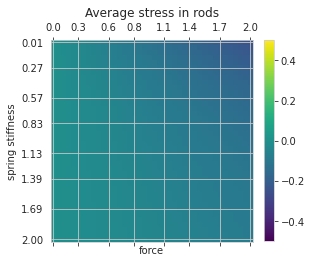

In [7]:
figure = plt.gcf()
figure.set_size_inches(10, 10)

plt.matshow(avg_stress_results, cmap='viridis', vmin=-0.5, vmax=0.5)

x_ticks = np.linspace(0, M-1, 8, dtype=int)
plt.xticks(x_ticks, (f'{x:.1f}' for x in body_forces[x_ticks]))
y_ticks = np.linspace(0, N-1, 8, dtype=int)
plt.yticks(y_ticks, [f'{s[0]:.2f}' for s in sprint_const[y_ticks]])

plt.xlabel('force')
plt.ylabel('spring stiffness')
plt.title('Average stress in rods')

plt.colorbar(fraction=0.045)